# Domain examples

## Marine (Earth Observation) Examples

I work for the Remote Sensing Group at PML. Our focus is on aquiring and processing satellite data covering the oceans.  This can include sea surface temperature, sea surface height and teh example i will use today, ocean colour. 

## ESA climate change initiative

CCI is a very large project funded by ESA split over multiple scientific domains. The Ocean Colur sub project has created an almost 20 year archive of ocean colour data. All variables have been caluclated with associated uncertainty. Basically a measure of the confidence in the value calculated. 

WCPS allows the use of multiple coverages in a single query. This menas that we can integrate the uncertainty data into any queries we do with respect to chlorphyll. Some practical examples follow.

### Find the number of pixels globally that have a RMSD uncertainty of less that 0.2

## Query
```
for  d in (CCI_V2_monthly_chlor_a_rmsd)
return 
encode((float)

 count(d[ ansi("2010-01-31T23:59:00")] < 0.2 )
, "csv"

)
```

In [8]:
import requests

query = """
for  d in (CCI_V2_monthly_chlor_a_rmsd)
return 
encode((float)

 count(d[ ansi("2010-01-31T23:59:00")] < 0.201 )
, "csv"

)
"""

resp = requests.post('http://earthserver.pml.ac.uk/rasdaman/ows/wcps', data = {'query':query})

print(resp.text)

13929


# Calculate chlorphyll average only where uncertainty is below a threshold


## Query

```
for c in ( CCI_V2_release_chlor_a ), d in (CCI_V2_monthly_chlor_a_rmsd)
return 
encode((float)
 avg(
 c[Long(0:10), Lat(45:55), ansi("2010-01-31T23:59:00")] *
  (d[Long(0:10), Lat(45:55), ansi("2010-01-31T23:59:00")] < 0.1 )
 ), "csv"

)
```

In [11]:
import requests

query = """
for c in ( CCI_V2_release_chlor_a ), d in (CCI_V2_monthly_chlor_a_rmsd)
return 
encode((float)
 avg(
 c[Long(0:10), Lat(45:55), ansi("2010-01-31T23:59:00")] *
  (d[Long(0:10), Lat(45:55), ansi("2010-01-31T23:59:00")] < 0.45 )
 ), "csv"

)
"""

resp = requests.post('http://earthserver.pml.ac.uk/rasdaman/ows/wcps', data = {'query':query})

print(resp.text)

0.286275


## applying your own colour scale and values to a chlorophyll concentratin map

## Query
```
for a in (CCI_V2_monthly_chlor_a) return encode (switch case 0.05 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 255; green: 255; blue: 255; alpha: 0} case 0.1 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 255; blue: 255; alpha: 255} case 0.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 128; blue: 255; alpha: 255} case 0.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 0; blue: 255; alpha: 255} case 1.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 218; green: 0; blue: 255; alpha: 255} case 3.0 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 0; blue: 255; alpha: 255} case 4.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 164; blue: 0; alpha: 255} case 6.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 250; blue: 0; alpha: 255} case 20 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 0; blue: 0; alpha: 255} default return {red: 255; green: 255; blue:255; alpha: 0} ,"png")
```

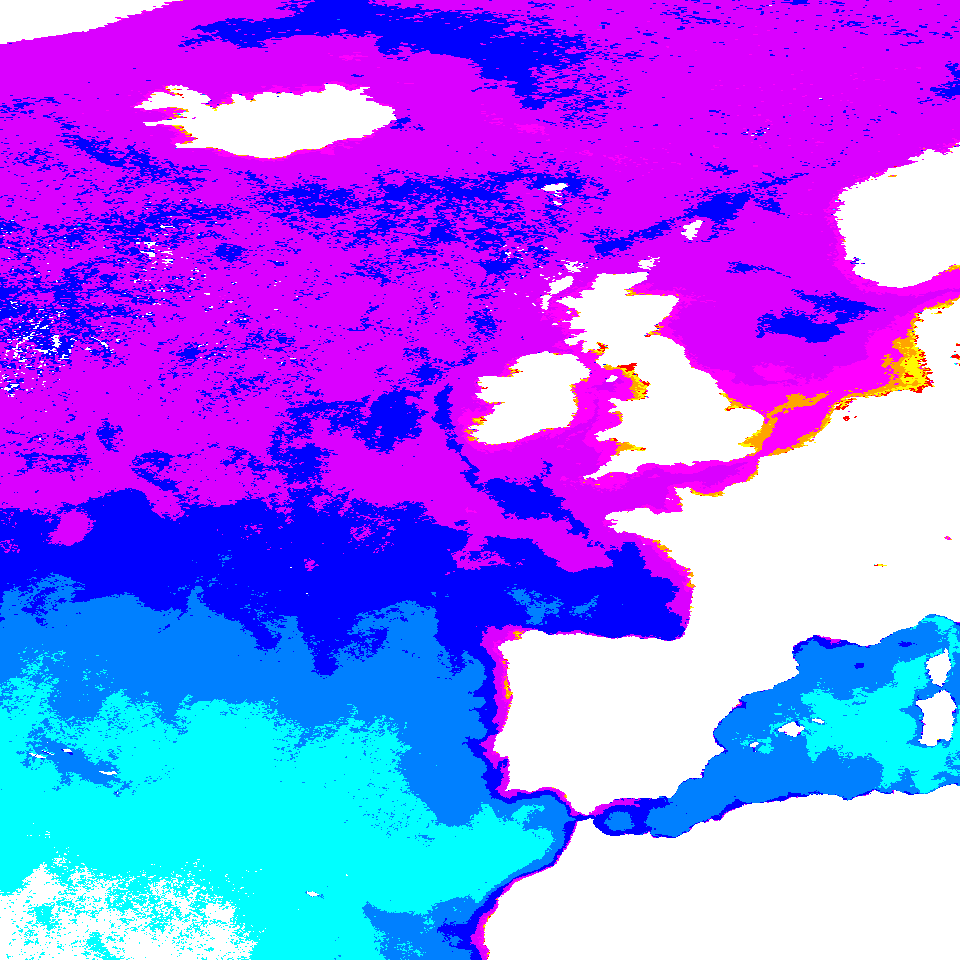

In [12]:
import requests

query = """
for a in (CCI_V2_monthly_chlor_a) return encode (switch case 0.05 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 255; green: 255; blue: 255; alpha: 0} case 0.1 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 255; blue: 255; alpha: 255} case 0.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 128; blue: 255; alpha: 255} case 0.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 0; blue: 255; alpha: 255} %0Acase 1.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 218; green: 0; blue: 255; alpha: 255} case 3.0 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 0; blue: 255; alpha: 255} case 4.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 164; blue: 0; alpha: 255} case 6.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 250; blue: 0; alpha: 255} case 20 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 0; blue: 0; alpha: 255} default return {red: 255; green: 255; blue:255; alpha: 0} ,"png")
"""

resp = requests.post('http://earthserver.pml.ac.uk/rasdaman/ows/wcps', data = {'query':query})

from IPython.display import Image 
Image(data=resp.content)

# Planetary Science

In [2]:
import numpy as np

import re

import math

from astropy.io import fits

import urllib 

import urllib2

#import requests

#import httplib

import xml.etree.ElementTree as ET

%matplotlib inline
import matplotlib.pyplot as plt

# reading the data from the bands_table.fits file

hdulist = fits.open("bands_table.fits")
tabledata = hdulist[1].data # assuming the first extension is a table

cols = hdulist[1].columns

band_name = tabledata["band_name"]
WV = tabledata["wavelength"]

%matplotlib notebook
#from ipywidgets import interact

def find_WV_bandname(name, nearest=True):
    # extract wavelength from formulation name e.g. R2950 --> 2950 nanometer --> 2.95 micrometer
    # nearest=True means that the nearest wavelength in the bands_table will be returned (default value)
    # nearest=False means that the exact wavelength as passed in 'name' shall be returned
    
    l = float(re.findall("\d+", name)[0])/1000 # converting into micrometer
    
    # nearest wavelength and the corresponding band name index of the given color
    idx = (np.abs(WV-l)).argmin()
    
    # return the corresponding values
    if (nearest==True):
        return WV[idx], band_name[idx]
    elif (nearest==False):
        return l, band_name[idx]


color = "R2260"

results = find_WV_bandname(color)

print "Corresponding wavelength and bandname of", color ,": WV =", results[0],"; Band name", results[1]

# family f1 is of the formuation : 1-(Rc/(a*Rs+b*Rl)

def f1(lst = []):
    # lst has the arguments: Rc, Rs, Rl
    WV_Rc , bn_Rc = find_WV_bandname(lst[0]) # Rc
    WV_Rs , bn_Rs  = find_WV_bandname(lst[1]) # Rs
    WV_Rl , bn_Rl  = find_WV_bandname(lst[2]) # Rl

    #print("Band names : {0} = {1}, {2} = {3}, {4} = {5}".format(lst[0], bn_Rc, lst[1], bn_Rs, lst[2], bn_Rl))    
        
    b = (WV_Rc - WV_Rs) / (WV_Rl - WV_Rs)
    a = 1-b
    
    # WCPS query as given by the computed product
    F = "(1 - (data.band_"+str(bn_Rc)+" / (("+str(a)+") * data.band_"+str(bn_Rs)+" + ("+str(b)+") * data.band_"+str(bn_Rl)+")))"
           
    # stretched value of F
    FS = "(float)((int)( 255 / ( max("+F+") - min("+F+") )) * ( ("+F+") - min("+F+") ))"
        
    return [FS, F]

#print f1(["R1320", "R1080", "R1750"])[1]

# family f1 is of the formuation : 1-(Rc/(a*Rs+b*Rl)

def f1(lst = []):
    # lst has the arguments: Rc, Rs, Rl
    WV_Rc , bn_Rc = find_WV_bandname(lst[0]) # Rc
    WV_Rs , bn_Rs  = find_WV_bandname(lst[1]) # Rs
    WV_Rl , bn_Rl  = find_WV_bandname(lst[2]) # Rl

    b = (WV_Rc - WV_Rs) / (WV_Rl - WV_Rs)
    a = 1-b
    
    # WCPS query as given by the computed product
    F = "(1 - (data.band_"+str(bn_Rc)+" / (("+str(a)+") * data.band_"+str(bn_Rs)+ \
        " + ("+str(b)+") * data.band_"+str(bn_Rl)+")))"
           
    # stretched value of F
    FS = "(float)((int)( 255 / ( max("+F+") - min("+F+") )) * ( ("+F+") - min("+F+") ))"
        
    return [FS, F]

# family f2 is of the formuation : MIN [ 1-(R1c/(a*R1s+b*R1l) , 1-(R2c/(a*R2s+b*R2l) ]

def f2(lst = []):
    # lst has the arguments: Rc1, Rs1, Rl1 , Rc2, Rs2, Rl2
    
    FS1 = f1(lst[0:3])[0]
    FS2 = f1(lst[3:])[0]
    
    FS = "( "+FS1+" < "+FS2+" ) * "+FS1+" + ( "+FS1+" > "+FS2+" ) * "+FS2
    
    return [FS]
  
#print f2(["R2165", "R2120", "R2350", "R2210", "R2120", "R2350"])[0]


# family f3 is of the formuation : 0.5 * (1-(R1c/(a*R1s+b*R1l)) + 0.5*( 1-(R2c/(a*R2s+b*R2l))

def f3(lst = []):
    # lst has the arguments: R1c, R1s, R1l, R2c, R2s, R2l
    
    F1 = f1(lst[0:3])[1] # for components R1c, R1s, R1l
    F2 = f1(lst[3:])[1] # for components R2c, R2s, R2l
    
    # WCPS query as given by the computed product
    F = "(0.5 * ("+F1+")"+" + 0.5 * ("+F2+"))" 
    
    # stretched value of F
    FS = "(float)((int)( 255 / ( max("+F+") - min("+F+") )) * ( ("+F+") - min("+F+") ))"
    
    return [FS, F]

#print f3(["R1930", "R1850", "R2067", "R1985", "R1850", "R2067"])[1]

# family f4 is of the formuation : R1

def f4(lst = []):
    # lst has the arguments: R1
    
    WV_R1 , bn_R1 = find_WV_bandname(lst[0]) # R1
    
    # WCPS query as given by the computed product
    F = "(data.band_"+str(bn_R1)+")"
    
    # stretched value of F
    FS = "(float)((int)( 255 / ( max("+F+") - min("+F+") )) * ( ("+F+") - min("+F+") ))"
        
    return [FS, F]

#print f4(["R1330"])[1]

# family f5 is of the formuation : R1/R2

def f5(lst = []):
    # lst has the arguments: R1, R2
    
    WV_R1 , bn_R1 = find_WV_bandname(lst[0]) # R1
    WV_R2 , bn_R2 = find_WV_bandname(lst[1]) # R2
    
    # WCPS query as given by the computed product
    F = "(data.band_"+str(bn_R1)+" / data.band_"+str(bn_R2)+")"
    
    # stretched value of F
    FS = "(float)((int)( 255 / ( max("+F+") - min("+F+") )) * ( ("+F+") - min("+F+") ))"
    
    return [FS, F]

#print f5(["R2530", "R2210"])[1]

# family f6 is of the formuation : 1-(R1/(R2*(R3/R4)))

def f6(lst = []):
    # lst has the arguments: R1, R2, R3, R4
    
    WV_R1 , bn_R1 = find_WV_bandname(lst[0]) # R1
    WV_R2 , bn_R2  = find_WV_bandname(lst[1]) # R2
    WV_R3 , bn_R3  = find_WV_bandname(lst[2]) # R3
    WV_R4 , bn_R4  = find_WV_bandname(lst[3]) # R4

    # WCPS query as given by the computed product
    F = "(1 - (data.band_"+str(bn_R1)+" / (data.band_"+str(bn_R2)+" * (data.band_"+str(bn_R3)+" / data.band_"+str(bn_R4)+"))))"
    
    # stretched value of F
    FS = "(float)((int)( 255 / ( max("+F+") - min("+F+") )) * ( ("+F+") - min("+F+") ))"
    
    return [FS, F]

#print f6(["R3000", "R2530", "R2530", "R2210"])[1]

# family f7 is of the formuation : 1-((a*Rs+b*Rl)/Rc)

def f7(lst = []):
    # lst has the arguments: Rs, Rl, Rc

    WV_Rs , bn_Rs  = find_WV_bandname(lst[0]) # Rs
    WV_Rl , bn_Rl  = find_WV_bandname(lst[1]) # Rl
    WV_Rc , bn_Rc = find_WV_bandname(lst[2]) # Rc

    #print("Band names : {0} = {1}, {2} = {3}, {4} = {5}".format(lst[2], bn_Rc, lst[0], bn_Rs, lst[1], bn_Rl))    
        
    b = (WV_Rc - WV_Rs) / (WV_Rl - WV_Rs)
    a = 1-b
    
    # WCPS query as given by the computed product
    F = "(1 - ( (("+str(a)+") * data.band_"+str(bn_Rs)+" + ("+str(b)+") * data.band_"+str(bn_Rl)+") / data.band_"+str(bn_Rc)+"))"
        
    # stretched value of F
    FS = "(float)((int)( 255 / ( max("+F+") - min("+F+") )) * ( ("+F+") - min("+F+") ))"
    
    return [FS, F]

#print f7(["R2120", "R2400", "R2290"])[1]

# family f8 is of the formuation : 1-((1-BD1)/(1-BD2)) i.e. composed of f1

def f8(lst = []):
    # lst has the arguments: dictionary, BD1, BD2
    
    dictionary = lst[0] 
    F1 = dictionary[lst[1]][0](dictionary[lst[1]][1])[1]
    F2 = dictionary[lst[2]][0](dictionary[lst[2]][1])[1]
    
    # WCPS query as given by the computed product
    F = "(1 - ((1 - "+F1+") / (1 - "+F2+")))"
    
    # stretched value of F
    FS = "(float)((int)( 255 / ( max("+F+") - min("+F+") )) * ( ("+F+") - min("+F+") ))"
    
    return [FS, F]

# as dictionary hasn't been defined so far - e.g. for f8 can be seen after the definition of the dictionary

# family f9 is of the formuation : ((R1-R2)/(W2-W1))

def f9(lst = []):
    # lst has the arguments: R1, R2
    
    WV_W1, bn_R1 = find_WV_bandname(lst[0], nearest=False) # W1 and R1
    WV_W2, bn_R2 = find_WV_bandname(lst[1], nearest=False) # W2 and R2
    
    # WCPS query as given by the computed product
    F = "((data.band_"+str(bn_R1)+" - data.band_"+str(bn_R2)+") / ("+str(WV_W2)+" - "+str(WV_W1)+"))"
    
    # calculating the slope and intercept for f12 which changes a bit: R2-R1/W2-W1
    slope = "((data.band_"+str(bn_R2)+" - data.band_"+str(bn_R1)+") / ("+str(WV_W2)+" - "+str(WV_W1)+"))"
    
    intercept = "(data.band_"+str(bn_R2)+" - "+slope+" * "+str(WV_W2)+")"    
    
    # stretched value of F
    FS = "(float)((int)( 255 / ( max("+F+") - min("+F+") )) * ( ("+F+") - min("+F+") ))" 
    
    return [FS, slope, intercept]    

#print f9(["R1815", "R2530"])[1]

def RC(lst = []):
    # lst has the arguments: RC, [R1, R2] with R1 and R2 the anchors
    
    WV_RC = find_WV_bandname(lst[0], nearest=False)[0]
    
    slope, intercept = f9(lst[1])[1:]
    
    F = "("+slope+" * "+str(WV_RC)+" + "+intercept+")"

    return F

#print RC(["RB2600",["R2456", "R2530"]])

# family f10 is of the formuation : RB1 = (RC1 - R1) / R1

def f10(lst = []):
    # lst has the arguments: RB, [R1, R2] where R1, R2 are the anchors
    
    # note that for finding bandname of a product, the initials do not matter i.e. whether it is RBXXXX,
    # RCXXXX or RXXXX - all have the same bandnames and here the parameter RB does not imply the function
    # but rather the bandname associated with it
        
    F_RC = RC(lst)
    F_R = f4(lst)[1] # Using formulation of family f4 : R1
    
    # WCPS query as given by the computed product
    F = "(("+F_RC+" - "+F_R+")/ "+F_RC+")"
    
    # stretched value of F
    FS = "(float)((int)( 255 / ( max("+F+") - min("+F+") )) * ( ("+F+") - min("+F+") ))"
    
    return [FS, F]

#print f10(["RB1210",["R1750","R2400"]])[1]

# family f10_prima is a special formulation of f10 to include the absolute parameter to compute OLINDEX3

# rest is the same as f10 : RB1 = (RC1 - R1) / R1

def f10_prima(lst = []):
    # lst has the arguments: RB, [R1, R2] where R1, R2 are the anchors
    
    # note that for finding bandname of a product, the initials do not matter i.e. whether it is RBXXXX,
    # RCXXXX or RXXXX - all have the same bandnames and here the parameter RB does not imply the function
    # but rather the bandname associated with it
        
    F_RC = RC(lst)
    F_R = f4(lst)[1] # Using formulation of family f4 : R1
    
    # WCPS query as given by the computed product !!!
    #F = "((("+F_RC+" - "+F_R+")/ (abs"+F_RC+"))"
    F = "(("+F_RC+" - "+F_R+")/ (abs"+F_RC+"))"
    
    # stretched value of F
    FS = "(float)((int)( 255 / ( max("+F+") - min("+F+") )) * ( ("+F+") - min("+F+") ))"
    
    return [FS, F]

#print f10(["RB1210",["R1750","R2400"]])[1]

# family f11 is of the formuation : 1- (Ra/a + Rb/RCb + Rc/RCc  + ... )/(Ra/a + Rb/RCb + Rc/RCc  + ... )

def f11(lst = []):
    # lst has the arguments: [Ra, Rb, Rc, ...], [Rx, Ry, Rz, ...], [R1, R2] where R1, R2 are the anchors for RC
    # and a,b,c... indicate the parameter under consideration in numerator
    # and x,y,z... indicate the parameter under consideration in denominator
    
    # computing the WCPS query as given by the computed product
    
    # numerator
    F_n = ""
    for i in range(len(lst[0])):
        F_R = f4([lst[0][i]])[1]
        F_RC = RC([lst[0][i],lst[-1]])
        
        if i == 0:
            F_n = F_n+F_R+" / "+F_RC
        else:
            F_n = F_n+" + "+F_R+" / "+F_RC
            
    # denominator
    F_d = ""
    for i in range(len(lst[0])):
        F_R = f4([lst[1][i]])[1]
        F_RC = RC([lst[1][i],lst[-1]])
        
        if i == 0:
            F_d = F_d+F_R+" / "+F_RC
        else:
            F_d = F_d+" + "+F_R+" / "+F_RC
            
    F = "(1-("+F_n+" / "+F_d+"))"
    
    # stretched value of F
    FS = "(float)((int)( 255 / ( max("+F+") - min("+F+") )) * ( ("+F+") - min("+F+") ))"
    
    return [FS, F]
    
#print f11([["R2210","RC2230"],["R2165","R2165"],["R1815","R2430"]])[1]

# family f12 is of the formuation : RBa*a + RBb*b + RBc*c  + ... 

def f12(lst = []):
    # lst has the arguments: [RBa, a], [RBb,b], [RBc,c]..., [R1, R2] where R1, R2 are the anchors for RC
    # and a,b,c.. indicate the parameter under consideration
    
    # computing the WCPS query as given by the computed product
    F = ""
    for i in range(len(lst)-1):
        F_RB = f10([lst[i][0],lst[-1]])[1]
        if i == 0:
            F = F+F_RB+" * "+str(lst[i][1])
        else:
            F = F+" + "+F_RB+" * "+str(lst[i][1])
            
    F = "("+F+")"
    #print F
        
    # stretched value of F
    FS = "(float)((int)( 255 / ( max("+F+") - min("+F+") )) * ( ("+F+") - min("+F+") ))"
    
    return [FS, F]
    
#print f12([["RB2120",0.10], ["RB2140",0.10], ["RB2230",0.15], ["R1690","R2530"]])[1]

# family f13 is of the formuation : RBa*a + RBb*b + RBc*c  + ... 

def f13(lst = []):
    # lst has the arguments: [RBa, a], [RBb,b], [RBc,c]..., [R1, R2] where R1, R2 are the anchors for RC
    # and a,b,c.. indicate the parameter under consideration
    
    # computing the WCPS query as given by the computed product (using f10_prima)
    F = ""
    for i in range(len(lst)-1):
        F_RB = f10_prima([lst[i][0],lst[-1]])[1]
        if i == 0: # !!!
            #F = F+F_RB+" * "+str(lst[i][1]) +" )"
            F = F+F_RB+" * "+str(lst[i][1])
        else:
            #F = F+" + "+F_RB+" * "+str(lst[i][1])+" )"
            F = F+" + "+F_RB+" * "+str(lst[i][1])
            
    #F = F
    F = "("+F+")"
        
    # stretched value of F
    FS = "(float)((int)( 255 / ( max("+F+") - min("+F+") )) * ( ("+F+") - min("+F+") ))"
    
    return [FS, F]
    
#print f12([["RB2120",0.10], ["RB2140",0.10], ["RB2230",0.15], ["R1690","R2530"]])[1]

def coordinates(coverage_id):

    coverageID = coverage_id.upper() # convert coverage_id to uppercase for XML file info on coverage
    xml_url = urllib.urlopen("http://access.planetserver.eu:8080/ps2/dataset?request=getCoverage&coverageID="+coverageID)
    xml_url_string = xml_url.read()

    #print xml_url_string
    
    tree = ET.fromstring(xml_url_string) # converting xml string into elements for parsing

    # storing the coverage_id's bounding coordinates i.e. maximum and minimum Latitudes and Longitudes 
    coords_degrees = {} 
    coords_metres = {} 
    centroid = {}
    
    r = 3396190.0
    
    for i in range(4):
        coords_degrees[tree[1][0][2][i].tag] = float(tree[1][0][2][i].text)
        if 'Lat' in tree[1][0][2][i].tag:
            coords_metres[tree[1][0][2][i].tag] = float(tree[1][0][2][i].text)*r*np.pi/180
        else:
            coords_metres[tree[1][0][2][i].tag] = float(tree[1][0][2][i].text)*r*np.pi/180
    #for j in range(1):
    #    centroid[tree[1][0][3][j].tag] = float([tree[1][0][3][j].text])
    centroid_long = float(tree[1][0][3][1].text)
            

    return coords_degrees, coords_metres, centroid_long
        
#coordinates("FRT00005A94_07_IF163L_TRR3")[2]
#print coordinates("FRT00005A94_07_IF163L_TRR3")[1]

summary_products = { "BD1300" : [f1, ["R1320", "R1080", "R1750"]], "BD1400" : [f1, ["R1395", "R1330", "R1467"]], 
                    "BD1435" : [f1, ["R1435", "R1370", "R1470"]], "BD1500_2" : [f1, ["R1525", "R1367", "R1808"]], 
                    "BD1750_2" : [f1, ["R1750", "R1690", "R1815"]], "BD2100_2" : [f1, ["R2132", "R1930", "R2250"]], 
                    "BD2165" : [f1, ["R2165", "R21!!!20", "R2230"]], "BD2190" : [f1, ["R2185", "R2120", "R2250"]],
                    "BD2210_2" : [f1, ["R2210", "R2165", "R2250"]], "BD2230" : [f1, ["R2235", "R2210", "R2252"]],
                    "BD2250" : [f1, ["R2245", "R2120", "R2340"]], "BD2265" : [f1, ["R2265", "R2210", "R2340"]],
                    "BD2290" : [f1, ["R2290", "R2250", "R2350"]], "BD2355" : [f1, ["R2355", "R2300", "R2450"]],
                    "BD2500_2" : [f1, ["R2480", "R2364", "R2570"]], "BD3100" : [f1, ["R3120", "R3000", "R3250"]],
                    "BD3200" : [f1, ["R3320", "R3250", "R3390"]], "BD3400_2" : [f1, ["R3420", "R3250", "R3630"]],
                    "BD2600" : [f1, ["R2600", "R2530", "R2630"]], 
                    "MIN2200" : [f2, ["R2165", "R2120", "R2350", "R2210", "R2120", "R2350"]], 
                    "MIN2250" : [f2, ["R2210", "R2165", "R2350", "R2265", "R2165", "R2350"]], 
                    "MIN2295_2480" : [f2, ["R2295", "R2165", "R2364", "R2480", "R2364", "R2570"]], 
                    "MIN2345_2537" : [f2, ["R2345", "R2250", "R2430", "R2537", "R2430", "R2602"]], 
                    "BD1900_2" : [f3, ["R1930", "R1850", "R2067", "R1985", "R1850", "R2067"]], 
                    "R1330" : [f4,["R1330"]], "R1080" : [f4,["R1080"]],  "R1506" : [f4,["R1506"]],
                    "R2529" : [f4,["R2529"]], "R3920" : [f4,["R3920"]],
                    "IRR2" : [f5,["R2530", "R2210"]], "IRR3" : [f5,["R3500", "R3390"]],
                    "BD3000" : [f6,["R3000", "R2530", "R2530", "R2210"]], 
                    "SINDEX2" : [f7, ["R2120", "R2400", "R2290"]], "CINDEX2" : [f7, ["R3450", "R3875", "R3610"]], 
                    "ISLOPE1" : [f9,["R1815", "R2530"]], 
                    "ICER2_2" : [f10,["RB2600",["R2456", "R2530"]]],
                    "D2200" : [f11,[["R2210","R2230"],["R2165","R2165"],["R1815","R2430"]]], 
                    "D2300" : [f11,[["R2290","R2320","R2330"],["R2120","R2170","R2210"],["R1815","R2530"]]],
                    "BD1900r2" : [f11,[["R1908","R1914","R1921","R1928","R1934","R1941"],["R1862","R1869","R1875","R2112","R2120","R2126"],["R1850","R2060"]]],
                    "LCPINDEX2" : [f12,[["RB1690",0.20], ["RB1750",0.20], ["RB1810",0.30], ["RB1870",0.30], ["R1560","R2450"]]],
                    "HCPINDEX2" : [f12,[["RB2120",0.10], ["RB2140",0.10], ["RB2230",0.15], ["RB2250",0.30], ["RB2430",0.20], ["RB2460",0.15], ["R1690","R2530"]]],
                    "OLINDEX3" : [f13,[["RB1210",0.1], ["RB1250",0.1], ["RB1263",0.2], ["RB1276",0.2], ["RB1330",0.4], ["R1750","R1860"]]],
                    "HCPINDEX3" : [f12,[["RB2120",0.10], ["RB2140",0.10], ["R1690","R2530"]]]} 
                    
summary_products["ICER1_2"] = [f8, [summary_products, "BD1435", "BD1500_2"]]

def get_data(url):
   response = urllib2.urlopen(url)
   data = np.genfromtxt(response,delimiter = ' ', dtype = float)
   return data

def plot_spectra(N, E, coverage_id):
    
    query = "http://access.planetserver.eu:8080/rasdaman/ows?query=for%20c%20in%20(" + coverage_id + ")%20return%20encode(c[%20N(" + str(N) + ":" + str(N) + "),%20E(" + str(E) + ":" + str(E) + ")%20],%20%22csv%22)"
    data = get_data(query)
    for x in range (0,len(data)):
        if data[x] == 65535 or math.isnan(data[x]):
            data[x] = 0
#        avg_denom[x] = avg_denom[x] + data[x]

    ymax = max(data[3:244])
    ymin = min(data[3:244])
    delta = 0.01
    x_axis = [1.00135, 1.0079, 1.0144500000000001, 1.0209999999999999, 1.02755, 1.0341, 1.0406500000000001, 1.0471999999999999, 1.05375, 1.0603, 1.0668500000000001, 1.07341, 1.07996, 1.0865100000000001, 1.09307, 1.09962, 1.1061700000000001, 1.11273, 1.1192800000000001, 1.12584, 1.13239, 1.1389499999999999, 1.14551, 1.1520600000000001, 1.15862, 1.1651800000000001, 1.1717299999999999, 1.1782900000000001, 1.18485, 1.1914100000000001, 1.19797, 1.2045300000000001, 1.21109, 1.2176499999999999, 1.22421, 1.2307699999999999, 1.23733, 1.2438899999999999, 1.2504500000000001, 1.25701, 1.2635700000000001, 1.27014, 1.2766999999999999, 1.2832600000000001, 1.28983, 1.2963899999999999, 1.3029500000000001, 1.30952, 1.3160799999999999, 1.3226500000000001, 1.32921, 1.33578, 1.3423400000000001, 1.3489100000000001, 1.35548, 1.36205, 1.3686100000000001, 1.3751800000000001, 1.38175, 1.38832, 1.39489, 1.4014500000000001, 1.40802, 1.41459, 1.42116, 1.4277299999999999, 1.43431, 1.4408799999999999, 1.4474499999999999, 1.4540200000000001, 1.4605900000000001, 1.46716, 1.47374, 1.48031, 1.48688, 1.49346, 1.50003, 1.50661, 1.51318, 1.51976, 1.52633, 1.53291, 1.53948, 1.54606, 1.55264, 1.55921, 1.56579, 1.57237, 1.5789500000000001, 1.58552, 1.5921000000000001, 1.5986800000000001, 1.6052599999999999, 1.6118399999999999, 1.61842, 1.625, 1.63158, 1.6381600000000001, 1.6447400000000001, 1.65133, 1.65791, 1.66449, 1.6710700000000001, 1.6776599999999999, 1.68424, 1.69082, 1.6974100000000001, 1.7039899999999999, 1.71058, 1.71716, 1.7237499999999999, 1.7303299999999999, 1.73692, 1.7435099999999999, 1.7500899999999999, 1.75668, 1.7632699999999999, 1.7698499999999999, 1.77644, 1.7830299999999999, 1.78962, 1.7962100000000001, 1.8028, 1.8093900000000001, 1.8159799999999999, 1.82257, 1.8291599999999999, 1.83575, 1.8423400000000001, 1.84893, 1.8555200000000001, 1.86212, 1.8687100000000001, 1.8753, 1.8818999999999999, 1.88849, 1.8950800000000001, 1.90168, 1.9082699999999999, 1.9148700000000001, 1.9214599999999999, 1.9280600000000001, 1.93465, 1.9412499999999999, 1.9478500000000001, 1.95444, 1.9610399999999999, 1.9676400000000001, 1.97424, 1.9808399999999999, 1.98743, 1.99403, 2.0006300000000001, 2.0072299999999998, 2.01383, 2.0204300000000002, 2.0270299999999999, 2.03363, 2.0402399999999998, 2.04684, 2.0534400000000002, 2.0600399999999999, 2.06664, 2.0732499999999998, 2.07985, 2.0864500000000001, 2.0930599999999999, 2.0996600000000001, 2.1062699999999999, 2.11287, 2.1194799999999998, 2.12608, 2.1326900000000002, 2.1393, 2.1459000000000001, 2.1525099999999999, 2.1591200000000002, 2.1657199999999999, 2.1723300000000001, 2.1789399999999999, 2.1855500000000001, 2.1921599999999999, 2.1987700000000001, 2.2053799999999999, 2.2119900000000001, 2.2185999999999999, 2.2252100000000001, 2.2318199999999999, 2.2384300000000001, 2.2450399999999999, 2.2516500000000002, 2.25827, 2.2648799999999998, 2.27149, 2.2780999999999998, 2.2847200000000001, 2.2913299999999999, 2.2979500000000002, 2.3045599999999999, 2.3111799999999998, 2.31779, 2.3244099999999999, 2.3310200000000001, 2.3376399999999999, 2.3442599999999998, 2.35087, 2.3574899999999999, 2.3641100000000002, 2.3707199999999999, 2.3773399999999998, 2.3839600000000001, 2.3905799999999999, 2.3972000000000002, 2.4038200000000001, 2.4104399999999999, 2.4170600000000002, 2.4236800000000001, 2.4302999999999999, 2.4369200000000002, 2.44354, 2.45017, 2.4567899999999998, 2.4634100000000001, 2.4700299999999999, 2.4766599999999999, 2.4832800000000002, 2.4899, 2.4965299999999999, 2.50312, 2.5097200000000002, 2.5163199999999999, 2.5229200000000001, 2.5295100000000001, 2.5361099999999999, 2.54271, 2.5493100000000002, 2.5559099999999999, 2.5625100000000001, 2.5691099999999998, 2.5757099999999999, 2.5823100000000001, 2.5889099999999998, 2.59551, 2.6021200000000002, 2.6087199999999999, 2.6153200000000001, 2.6219199999999998, 2.62853, 2.6351300000000002, 2.64174, 2.6483400000000001, 2.6549499999999999, 2.6615500000000001, 2.6681599999999999, 2.67476, 2.6813699999999998, 2.68798, 2.6945800000000002, 2.70119, 2.7606799999999998, 2.76729, 2.7738999999999998, 2.7805200000000001, 2.7871299999999999, 2.7937400000000001, 2.8003499999999999, 2.8069700000000002, 2.81358, 2.8201999999999998, 2.82681, 2.8334299999999999, 2.8400400000000001, 2.84666, 2.8532799999999998, 2.85989, 2.8665099999999999, 2.8731300000000002, 2.87975, 2.8863599999999998, 2.8929800000000001, 2.8996, 2.9062199999999998, 2.9128400000000001, 2.9194599999999999, 2.9260799999999998, 2.9327000000000001, 2.9393199999999999, 2.9459499999999998, 2.9525700000000001, 2.95919, 2.9658099999999998, 2.9724400000000002, 2.97906, 2.9856799999999999, 2.9923099999999998, 2.9989300000000001, 3.00556, 3.0121799999999999, 3.0188100000000002, 3.0254400000000001, 3.03206, 3.0386899999999999, 3.0453199999999998, 3.0519500000000002, 3.05857, 3.0651999999999999, 3.0718299999999998, 3.0784600000000002, 3.0850900000000001, 3.09172, 3.0983499999999999, 3.1049799999999999, 3.1116100000000002, 3.1182500000000002, 3.1248800000000001, 3.13151, 3.1381399999999999, 3.1447799999999999, 3.1514099999999998, 3.1580400000000002, 3.1646800000000002, 3.1713100000000001, 3.1779500000000001, 3.18458, 3.1912199999999999, 3.1978499999999999, 3.2044899999999998, 3.2111299999999998, 3.2177600000000002, 3.2244000000000002, 3.2310400000000001, 3.2376800000000001, 3.2443200000000001, 3.2509600000000001, 3.2576000000000001, 3.26424, 3.27088, 3.27752, 3.28416, 3.2907999999999999, 3.2974399999999999, 3.3040799999999999, 3.31073, 3.3173699999999999, 3.3240099999999999, 3.33066, 3.3372999999999999, 3.34395, 3.35059, 3.35724, 3.36388, 3.37053, 3.37717, 3.3838200000000001, 3.3904700000000001, 3.3971200000000001, 3.4037600000000001, 3.4104100000000002, 3.4170600000000002, 3.4237099999999998, 3.4303599999999999, 3.4370099999999999, 3.4436599999999999, 3.45031, 3.45696, 3.4636100000000001, 3.4702600000000001, 3.4769199999999998, 3.4835699999999998, 3.4902199999999999, 3.4968699999999999, 3.50353, 3.5101800000000001, 3.5168400000000002, 3.5234899999999998, 3.5301499999999999, 3.5367999999999999, 3.5434600000000001, 3.5501100000000001, 3.5567700000000002, 3.5634299999999999, 3.5700799999999999, 3.57674, 3.5834000000000001, 3.5900599999999998, 3.5967199999999999, 3.60338, 3.6100400000000001, 3.6166999999999998, 3.6233599999999999, 3.63002, 3.6366800000000001, 3.6433399999999998, 3.6499999999999999, 3.6566700000000001, 3.6633300000000002, 3.6699899999999999, 3.67665, 3.6833200000000001, 3.6899799999999998, 3.69665, 3.7033100000000001, 3.7099799999999998, 3.7166399999999999, 3.7233100000000001, 3.7299799999999999, 3.73664, 3.7433100000000001, 3.7499799999999999, 3.75665, 3.7633100000000002, 3.7699799999999999, 3.7766500000000001, 3.7833199999999998, 3.78999, 3.7966600000000001, 3.8033299999999999, 3.8100000000000001, 3.8166699999999998, 3.82335, 3.8300200000000002, 3.8366899999999999, 3.8433600000000001, 3.8500399999999999, 3.8567100000000001, 3.8633899999999999, 3.8700600000000001, 3.8767299999999998, 3.88341, 3.8900800000000002, 3.89676, 3.9034399999999998, 3.91011, 3.9167900000000002, 3.92347, 3.9301499999999998, 3.93682, 4.0]
    

    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.plot(x_axis,data)
    ax.set_xlim(xmin=1.0, xmax=2.6)
    ax.set_ylim(ymin=ymin-delta, ymax=ymax+delta)

def polar_coordinates_negative(lat, lon, coverage_id):
    
    rho = 3396190
    lat0 = -90
    lon0 = coordinates(coverage_id)[2]
    
    k = 2 / (1 + math.sin(lat0 * rho) * math.sin(lat * rho) + math.cos(lat0 * rho) * math.cos(lat * rho) * math.cos(lon * rho - lon0 * rho))
    #print(k)
    N = rho * k * (math.cos(lat0 * rho) * math.sin(lat * rho) - math.sin(lat0 * rho) * math.cos(lat * rho) * math.cos(lon * rho - lon0 * rho))
    E = rho * k * math.cos(lat * rho) * math.sin(lon * rho - lon0 * rho)

    return N,E
    
def polar_coordinates_positive(lat, lon, coverage_id):
    
    rho = 3396190
    lat0 = 90
    lon0 = coordinates(coverage_id)[2]
    
    k = 2 / (1 + math.sin(lat0 * rho) * math.sin(lat * rho) + math.cos(lat0 * rho) * math.cos(lat * rho) * math.cos(lon * rho - lon0 * rho))
    N = rho * k * (math.cos(lat0 * rho) * math.sin(lat * rho) - math.sin(lat0 * rho) * math.cos(lat * rho) * math.cos(lon * rho - lon0 * rho))
    E = rho * k * (math.cos(lat * rho) * math.sin(lon * rho - lon0 * rho))
    
    return N,E

    
def coordinates_trans(lat, lon, coverage_id):
    
    if lat > 65:
        new_lst_positive = polar_coordinates_positive(lat,lon)
        N = new_lst_positive[0]
        E = new_lst_positive[1]
        
    elif lat < -65:
        new_lst_negative = polar_coordinates_negative(lat,lon)
        N = new_lst_negative[0]
        E = new_lst_negative[1]
        
    else:    
        r = 3396190
        rho = (math.pi / 180)
        E = lon * r * rho
        N = lat  * r * rho
        
    return N, E

#print(polar_coordinates_positive(79, 1, "hrl0000b877_07_if185l_trr3"))

def URL_creator(coverage_id, red, green, blue, summary_products):
    # Takes the coverage_id, the bands in red, green and blue and computes their corresponding
    # products by looking up from the passed dictionary "products"
    
    # storing FS for each channel with corresponding family function in FSr, FSg, FSb resp.
    FSr = summary_products[red][0](summary_products[red][1])[0]
    FSg = summary_products[green][0](summary_products[green][1])[0]
    FSb = summary_products[blue][0](summary_products[blue][1])[0]
       
    URL = "http://access.planetserver.eu:8090/python?wcpsQuery=http://access.planetserver.eu:8080/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for data in ( "+coverage_id+" ) return encode({ red: "+FSr+";green: "+FSg+";blue: "+FSb+";alpha: (float)((data.band_100 > 0) * 255)}, \"png\", \"nodata=65535\")"
   
    index = URL.find("for")
    URL_to_encode = URL[index:]
    
    
    
#    url = "http://localhost:8090/python"
#    petascopeEndPoint = 'http://mars.planetserver.eu:8080/rasdaman/ows?query='

#    wcpsQuery = 'for data in (' + str(coverage_id) +') return encode({ red: ( (float)((int)( 255 / ( max((1 - (data.band_178 / ((0.800164224902) * data.band_171 + (0.199835775098) * data.band_206)))) - min((1 - (data.band_178 / ((0.800164224902) * data.band_171 + (0.199835775098) * data.band_206)))) )) * ( ((1 - (data.band_178 / ((0.800164224902) * data.band_171 + (0.199835775098) * data.band_206)))) - min((1 - (data.band_178 / ((0.800164224902) * data.band_171 + (0.199835775098) * data.band_206)))) )) < (float)((int)( 255 / ( max((1 - (data.band_185 / ((0.600198798565) * data.band_171 + (0.399801201435) * data.band_206)))) - min((1 - (data.band_185 / ((0.600198798565) * data.band_171 + (0.399801201435) * data.band_206)))) )) * ( ((1 - (data.band_185 / ((0.600198798565) * data.band_171 + (0.399801201435) * data.band_206)))) - min((1 - (data.band_185 / ((0.600198798565) * data.band_171 + (0.399801201435) * data.band_206)))) )) ) * (float)((int)( 255 / ( max((1 - (data.band_178 / ((0.800164224902) * data.band_171 + (0.199835775098) * data.band_206)))) - min((1 - (data.band_178 / ((0.800164224902) * data.band_171 + (0.199835775098) * data.band_206)))) )) * ( ((1 - (data.band_178 / ((0.800164224902) * data.band_171 + (0.199835775098) * data.band_206)))) - min((1 - (data.band_178 / ((0.800164224902) * data.band_171 + (0.199835775098) * data.band_206)))) )) + ( (float)((int)( 255 / ( max((1 - (data.band_178 / ((0.800164224902) * data.band_171 + (0.199835775098) * data.band_206)))) - min((1 - (data.band_178 / ((0.800164224902) * data.band_171 + (0.199835775098) * data.band_206)))) )) * ( ((1 - (data.band_178 / ((0.800164224902) * data.band_171 + (0.199835775098) * data.band_206)))) - min((1 - (data.band_178 / ((0.800164224902) * data.band_171 + (0.199835775098) * data.band_206)))) )) > (float)((int)( 255 / ( max((1 - (data.band_185 / ((0.600198798565) * data.band_171 + (0.399801201435) * data.band_206)))) - min((1 - (data.band_185 / ((0.600198798565) * data.band_171 + (0.399801201435) * data.band_206)))) )) * ( ((1 - (data.band_185 / ((0.600198798565) * data.band_171 + (0.399801201435) * data.band_206)))) - min((1 - (data.band_185 / ((0.600198798565) * data.band_171 + (0.399801201435) * data.band_206)))) )) ) * (float)((int)( 255 / ( max((1 - (data.band_185 / ((0.600198798565) * data.band_171 + (0.399801201435) * data.band_206)))) - min((1 - (data.band_185 / ((0.600198798565) * data.band_171 + (0.399801201435) * data.band_206)))) )) * ( ((1 - (data.band_185 / ((0.600198798565) * data.band_171 + (0.399801201435) * data.band_206)))) - min((1 - (data.band_185 / ((0.600198798565) * data.band_171 + (0.399801201435) * data.band_206)))) ));green: (float)((int)( 255 / ( max((1-((data.band_197) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.29 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_201) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.32 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_203) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.33 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) / (data.band_171) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.12 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_179) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.17 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_185) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.21 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53))))) - min((1-((data.band_197) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.29 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_201) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.32 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_203) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.33 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) / (data.band_171) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.12 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_179) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.17 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_185) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.21 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53))))) )) * ( ((1-((data.band_197) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.29 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_201) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.32 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_203) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.33 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) / (data.band_171) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.12 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_179) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.17 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_185) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.21 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53))))) - min((1-((data.band_197) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.29 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_201) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.32 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_203) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.33 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) / (data.band_171) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.12 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_179) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.17 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53)) + (data.band_185) / (((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.21 + (data.band_233 - ((data.band_233 - data.band_125) / (2.53 - 1.815)) * 2.53))))) ));blue: (float)((int)( 255 / ( max(((((((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.12 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53)) - (data.band_171))/ (((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.12 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53))) * 0.1 + (((((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.14 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53)) - (data.band_174))/ (((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.14 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53))) * 0.1)) - min(((((((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.12 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53)) - (data.band_171))/ (((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.12 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53))) * 0.1 + (((((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.14 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53)) - (data.band_174))/ (((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.14 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53))) * 0.1)) )) * ( (((((((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.12 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53)) - (data.band_171))/ (((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.12 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53))) * 0.1 + (((((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.14 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53)) - (data.band_174))/ (((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.14 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53))) * 0.1)) - min(((((((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.12 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53)) - (data.band_171))/ (((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.12 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53))) * 0.1 + (((((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.14 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53)) - (data.band_174))/ (((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.14 + (data.band_233 - ((data.band_233 - data.band_106) / (2.53 - 1.69)) * 2.53))) * 0.1)) ));alpha: (float)((data.band_100 > 0) * 255)}, "tiff", "nodata=65535")'

#    # must enquote the query or it is not valid request
#    URI = petascopeEndPoint + urllib.quote(wcpsQuery)

#    data = urllib.urlencode({'wcpsQuery' : URI})
#    req = urllib2.Request(url, data)




    encoded_URL='lol'
    params = urllib.urlencode({'query': urllib.quote(URL_to_encode)})
    f = urllib.urlopen("http://access.planetserver.eu:8080/rasdaman/ows", params)    

    #f = urllib.urlopen(encoded_URL)
    fig = plt.figure(figsize=(8,8))
    
    coords = coordinates(coverage_id)[0] # taking bounding box coordinates in metres
    # read the image file in a numpy array
    image = plt.imread(f)
    plt.imshow(image)
    plt.imshow(image, extent=[coords['minLong'],coords['maxLong'],coords['minLat'],coords['maxLat']])
    
    # defining a dictionary to collect the coordinate of image clicked

    collector = {'x':0.000000,'y':0.000000}

    def onclick(event):
        #collector.append('button=%d, x=%d, y=%d, xdata=%f, ydata=%f'%(event.button, event.x, event.y, event.xdata, event.ydata))
        #collector.append({'x':event.x, 'y':event.y, 'x_data':event.xdata, 'y_data':event.ydata})
        collector['x'] = event.xdata
        x_clicked = event.xdata
        collector['y'] = event.ydata
        y_clicked = event.ydata
        coordinate_xy = [x_clicked, y_clicked]
        print(coordinate_xy)
        plot_spectra(coordinate_xy[1], coordinate_xy[0], coverage_id)

    cid = fig.canvas.mpl_connect('button_press_event',onclick)

    #fig.canvas.mpl_disconnect(cid)
    #plt.show()

    return URL, encoded_URL, collector

print "Number of products in the dictionary = ", len(summary_products)

#print "\nf8 example: ", f8([summary_products, "BD1435", "BD1500_2"])[1]



Corresponding wavelength and bandname of R2260 : WV = 2.25827 ; Band name 192
Number of products in the dictionary =  44


# Hyperspectral analysis of CRISM images
## RGB combinations and spectral profiles

Part of my work focuses on the analysis of hyperspectral imagery to characterize minerals in different planetary surfaces. We use a different band math combinations in order to enhance the signal of certain materials.

## PlanetServer

PlanetServer is the planetary science data node from the EarthServer project. Its main aim is to serve and analyze planetary data through a webGIS client, a Python package and Jupyter notebooks. We query the data using WCPS which allows retrieving data along the datacube. This is usually done using ENVI + IDL which costs money...loads of it. PlanetServer is for free ;)

As an example, we can use Compact Reconnaissance Imaging Spectrometer for Mars (CRISM) data in order to find some specific materials. This is usually a two step process:

### CRISM summary products RGB combinations

We assign one summary product to each channel:
* r: Summary product in the red channel (e.g: BD1900_2)
* g: Summary product in the green channel (e.g: MIN2200)
* b: Summary product in the blue channel (e.g: D2300)

We choose the name of the image we want to query:
* coverage_id: frt0000c202_07_if165l_trr3

<IPython.core.display.Javascript object>


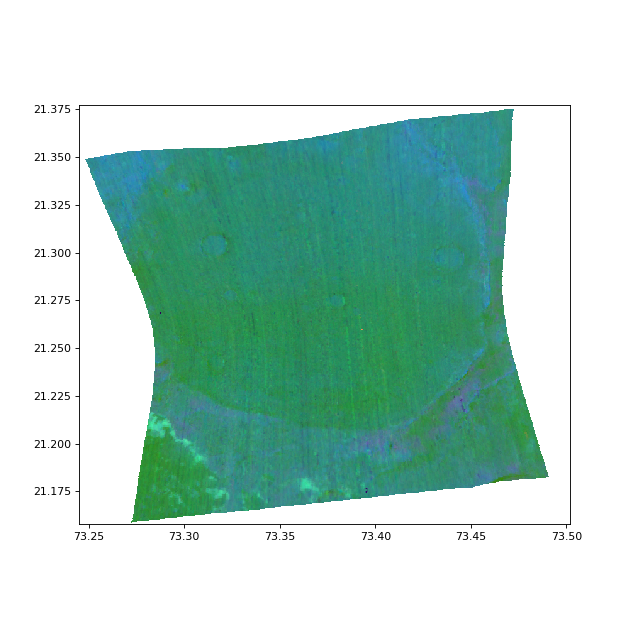

In [7]:
r = "BD1900_2"
g = "MIN2200"
b = "D2300"

# Note : Please take care that the coverage id has letters in lower case!
coverage_id = "frt0000c202_07_if165l_trr3"

url, encoded_url, point_clicked = URL_creator(coverage_id, r, g, b, summary_products)

## Spectral profiles

By clicking in the image it wild record the coordinates and send a query to retrieve the spectral information. The spectral profile can be compared to laboratory spectra in order to characterize the material.

{'y': 21.270179231497039, 'x': 73.404290386869903}


<IPython.core.display.Javascript object>


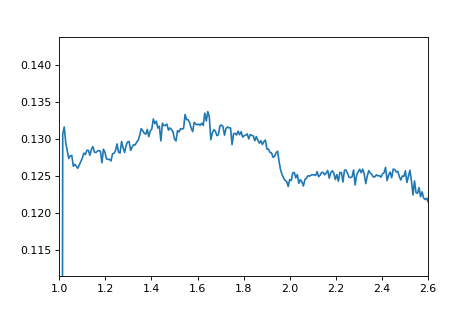

In [10]:
print(point_clicked)

coordinate_lat = point_clicked["y"]
coordinate_lon = point_clicked["x"]

coordinates_xy = coordinates_trans(coordinate_lat, coordinate_lon, coverage_id)
coordinate_x = coordinates_xy[1]
coordinate_y = coordinates_xy[0]

plot_spectra(coordinate_y, coordinate_x, coverage_id)

# Landsat data example

### Calculate a NDVI from a Landsat8 image

The query below calculated on the fly the Normalized-Difference-Vegetation-Index (NDVI) from a Landsat8 satellite image for UTM Zone 31. Landsat 8 provides 11 bands and the NDVI is produced using the bands 4 (red) and 5 (near-infrared).

> <font color="blue">for r in (L8_B6_32631_30), g in (L8_B5_32631_30), b in (L8_B4_32631_30)
return 
encode ( {
red:   ( (r * 0.00002) - 0.1 ) * 255;
green: ( (g * 0.00002) - 0.1 ) * 255;
blue:  ( (b * 0.00002) - 0.1 ) * 255
}
[E(377983:390000),N(4902991:4917275),unix(1433068497)]
,"png")</font>

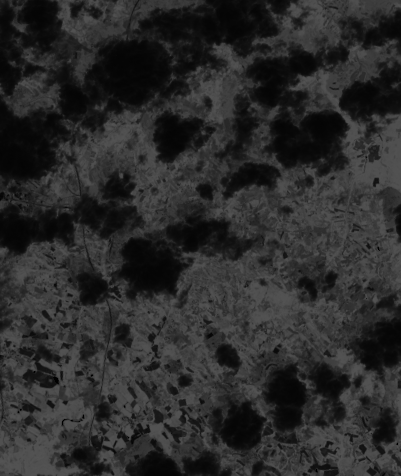

In [2]:
import requests

query = '''
for R in (L8_B4_32631_30), NIR in (L8_B5_32631_30)
return 
encode( (
(
    ( ((NIR*0.00002) - 0.1  ) - ( (R*0.00002) - 0.1 ) ) /
    ( ((NIR*0.00002)  - 0.1 ) + ( (R*0.00002)  - 0.1 ) )
)
[E(377983:390000),N(4902991:4917275),unix(1433068497)] )*100
, "png")
'''

resp = requests.post('http://eodataservice.org/rasdaman/ows/wcps', data = {'query':query})

from IPython.display import Image 
Image(data=resp.content)

# Libraries to make this easier

## OWSLib (currently our own version)

The library is already installed on these notebooks but if you would like to test it on your own machine you can get the source @  https://github.com/earthserver-eu/OWSLib/tree/olcl-wcs-200

A complete notebook of examples in <a href="./OWSLib_WCS_starter_guide.ipynb">HERE</a>

In [4]:
from owslib.wcs import WebCoverageService

my_wcs = WebCoverageService('http://earthserver.pml.ac.uk/rasdaman/ows?', version='2.0.0')

# print out coverages that have CCI in title
for coverage_name in my_wcs.contents.keys()[:5]:
    if 'CCI' in coverage_name:
        print coverage_name

OCCCI_V3_monthly_rrs_670_rmsd
OCCCI_V3_monthly_rrs_510_bias
OCCCI_V3_monthly_chlor_a_RMS


## ES data library

This is a new (in development) library that aims to wrap some of the low level interactions of the WCPS query interface. The library is already available through these notebooks and teh source is available @ https://github.com/earthserver-eu/es_data_lib

A complete notebook of examples in <a href="./es_data_lib_examples.ipynb">HERE</a>

In [5]:
from es_data_lib import coverages, services
from es_data_lib.query.point import Point
from es_data_lib.query.point_timeseries import PointTimeSeries
from es_data_lib.query.area import Area
from es_data_lib.query.area_timeseries import AreaTimeseries
from es_data_lib.service import Service


In [6]:
service = Service("http://earthserver.pml.ac.uk/rasdaman/ows")
point = Point(service,55, -40, "2006-06-01T00:00:00Z", service.coverages['OCCCI_V3_monthly_chlor_a'])

print point.data


for c in (OCCCI_V3_monthly_chlor_a)
return
encode (
   c[Lat(55), Long(-40), ansi("2006-06-01T00:00:00Z")], "csv"
)

0.6745
